In [140]:
import awkward as ak
import numpy as np
import pickle as pkl
import hist 
import matplotlib.pyplot as plt
import mplhep as hep
import uproot

import os
from numba import njit

hep.style.use('CMS')

In [ ]:
#def read_pythia(dir):
    

In [57]:
RAW_DATA_DIR = '/Users/ravikoka/repos/z_plus_hf/feasibility/data/multi_test/run0/'

In [152]:
def mass(pairs, left_mass, right_mass):
    left, right = ak.unzip(pairs)
    left_energy = np.sqrt(left.px**2 + left.py**2 + left.pz**2 + left_mass**2)
    right_energy = np.sqrt(right.px**2 + right.py**2 + right.pz**2 + right_mass**2)
    return np.sqrt((left_energy + right_energy)**2 -
                   (left.px + right.px)**2 -
                   (left.py + right.py)**2 -
                   (left.pz + right.pz)**2)

def opposite(pairs):
    left, right = ak.unzip(pairs)
    return pairs[left.pdg == -right.pdg]

def get_dimuon_invariant_mass(events_zipped):
    muon_filter = (events_zipped['pdg'] == 13) & (events_zipped['is_final'])
    muons = events_zipped[muon_filter]

    anti_muon_filter = (events_zipped['pdg'] == -13) & (events_zipped['is_final'])
    anti_muons = events_zipped[anti_muon_filter]
    
    pairs = ak.cartesian([muons, anti_muons])
    
    # inv_mass = hist.Hist(hist.axis.Regular(40, 0, 100, name='temp dimuon invariant mass'))
    # inv_mass.fill(ak.flatten(mass(pairs, 0.1056583755, 0.1056583755)))
    
    return ak.flatten(mass(pairs, 0.1056583755, 0.1056583755))

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x173e80fb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

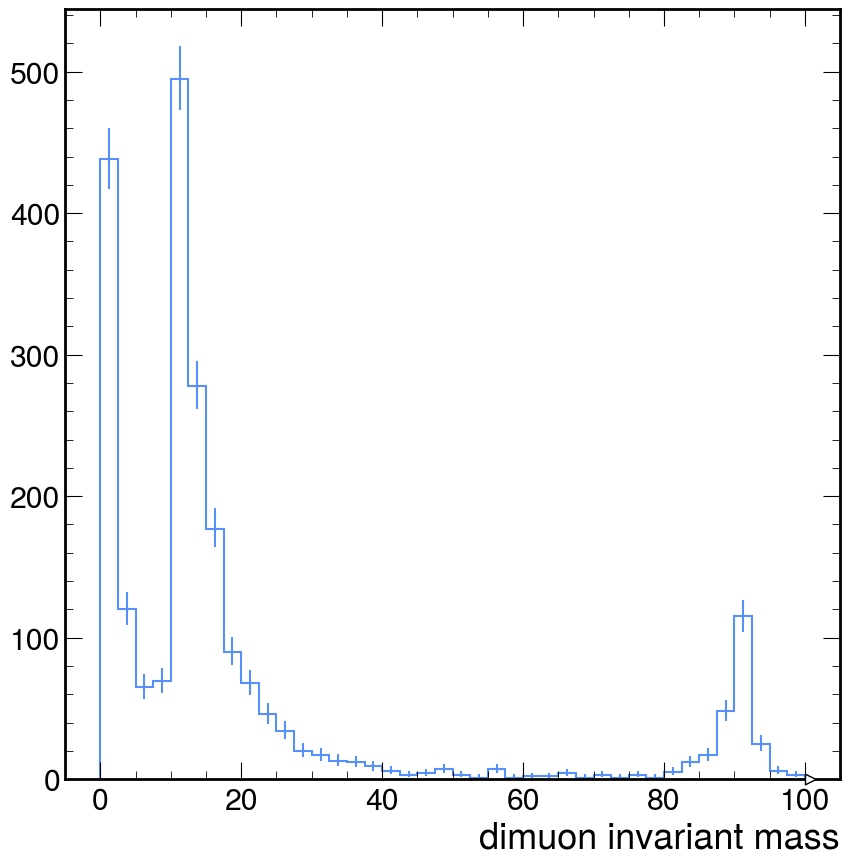

In [161]:
NUM_RUNS = 4
RAW_DATA_DIRS = [f'/Users/ravikoka/repos/z_plus_hf/feasibility/data/multi/run{i}/' for i in range(NUM_RUNS)]
inv_mass_dist = hist.Hist(hist.axis.Regular(40, 0, 100, name='dimuon invariant mass'))

for dir in RAW_DATA_DIRS:
    for file in os.listdir(dir):
    
        with open(dir + file, 'rb') as in_file:
            events, sig, err = pkl.load(in_file)
            
            events_zipped = ak.zip(
                {
                    'px': events['px'],
                    'py': events['py'],
                    'pz': events['pz'],
                    'pdg': events['pdg'],
                    'is_final': events['is_final'],
                    'mother_list': events['mother_list'],
                }, 
                depth_limit=2
            )
        
            inv_mass_dist.fill(get_dimuon_invariant_mass(events_zipped))
hep.histplot(inv_mass_dist)

In [156]:
RAW_DATA_DIR = '/Users/ravikoka/repos/z_plus_hf/feasibility/data/multi/run0/'

inv_mass_dist = hist.Hist(hist.axis.Regular(40, 0, 100, name='dimuon invariant mass'))
for file in os.listdir(RAW_DATA_DIR):
    
    with open(RAW_DATA_DIR + file, 'rb') as in_file:
        events, sig, err = pkl.load(in_file)
        
        events_zipped = ak.zip(
            {
                'px': events['px'],
                'py': events['py'],
                'pz': events['pz'],
                'pdg': events['pdg'],
                'is_final': events['is_final'],
                'mother_list': events['mother_list'],
            }, 
            depth_limit=2
        )
        
        inv_mass_dist.fill(get_dimuon_invariant_mass(events_zipped))
        #inv_mass += 

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x173ec9850>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

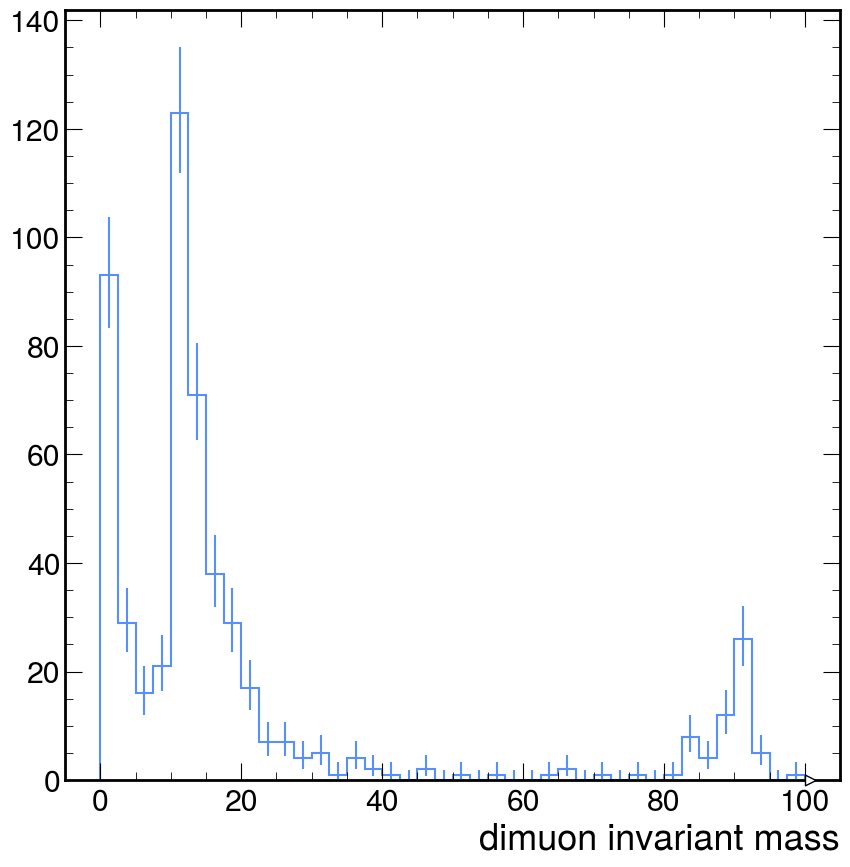

In [158]:
hep.histplot(inv_mass_dist)

In [72]:
events_zipped = ak.zip(
    {
        'px': events['px'],
        'py': events['py'],
        'pz': events['pz'],
        'pdg': events['pdg'],
        'is_final': events['is_final'],
        'mother_list': events['mother_list'],
    }, 
    depth_limit=2
)
events_zipped

<Array [[{px: 0, py: 0, ...}, ..., {...}], ...] type='500 * var * {px: floa...'>

In [127]:
muon_filter = (events_zipped['pdg'] == 13) & (events_zipped['is_final'])
muons = events_zipped[muon_filter]

anti_muon_filter = (events_zipped['pdg'] == -13) & (events_zipped['is_final'])
anti_muons = events_zipped[anti_muon_filter]
#events_zipped[0]

In [129]:
pairs = ak.cartesian([muons, anti_muons])

In [131]:
ak.flatten(pairs)

<Array [({...}, {...}), ..., ({...}, ..., ...)] type='32 * ({px: float64, p...'>

In [132]:
ak.flatten(mass(pairs, 0.1056583755, 0.1056583755))

<Array [11.9, 0.277, 20.4, 39.7, ..., 2.14, 0.283, 20] type='32 * float64'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x1770847d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

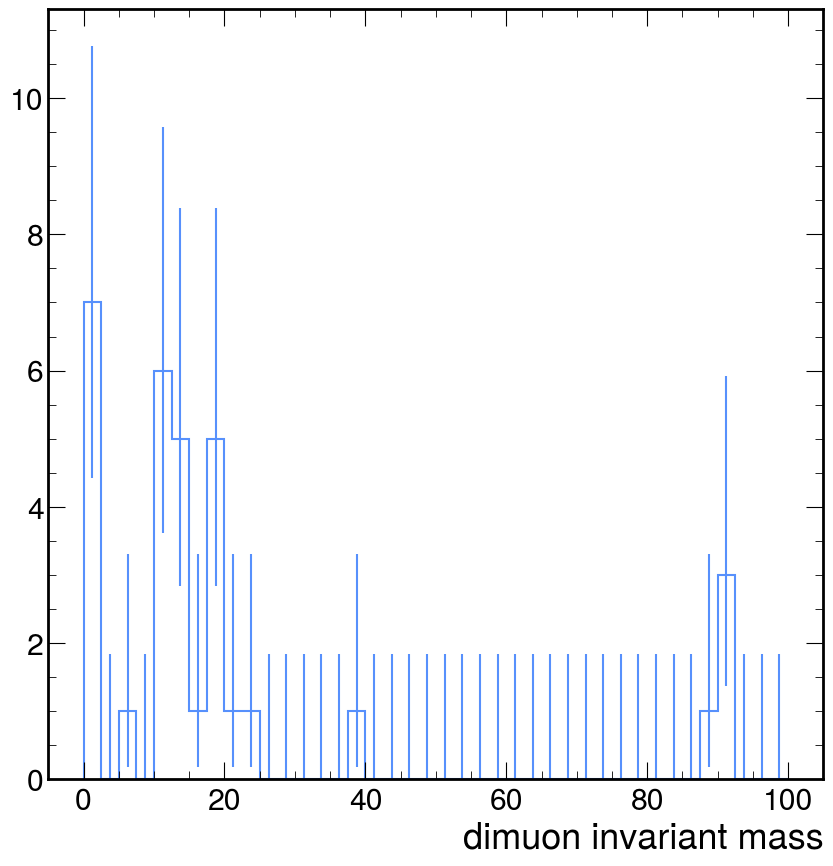

In [142]:
inv_mass = hist.Hist(hist.axis.Regular(40, 0, 100, name='dimuon invariant mass'))
inv_mass.fill(ak.flatten(mass(pairs, 0.1056583755, 0.1056583755)))
hep.histplot(inv_mass)

In [79]:
events_zipped['is_final']
set(ak.flatten(events_zipped[events_zipped['is_final']]['pdg']))

{np.int64(-2212),
 np.int64(-2112),
 np.int64(-321),
 np.int64(-211),
 np.int64(-16),
 np.int64(-14),
 np.int64(-13),
 np.int64(-12),
 np.int64(-11),
 np.int64(11),
 np.int64(12),
 np.int64(13),
 np.int64(14),
 np.int64(16),
 np.int64(22),
 np.int64(130),
 np.int64(211),
 np.int64(321),
 np.int64(2112),
 np.int64(2212)}

In [143]:
RAW_DATA_DIR = '/Users/ravikoka/repos/z_plus_hf/feasibility/data/multi_test/run0/'

Z_counter = 0
W_counter = 0

events_w_Z = ak.Array([])
for file in os.listdir(RAW_DATA_DIR):
    
    with open(RAW_DATA_DIR+ file, 'rb') as in_file:
        events, sig, err = pkl.load(in_file)
        
        z_counts = np.sum(events['pdg'] == 23)
        W_counts = np.sum(events['pdg'] == abs(24))
        
        if z_counts > 0:
            contains_Z = ak.any(events['pdg']==23, axis=1)
            events_w_Z = ak.concatenate([events_w_Z, events[contains_Z]])
        
        Z_counter += z_counts
        
        W_counter += W_counts

In [146]:
np.sum(ak.any((events['pdg']==23) & (events['pdg']==13), axis=1))

np.int64(0)

In [28]:
W_counter

np.int64(905)

In [29]:
W_counter

np.int64(905)

In [68]:
Z_counter

np.int64(974)

In [53]:
contains_muon = ak.any(abs(events['pdg'])==13, axis=1)
events_w_muons = events[contains_muon]

In [55]:
events_w_muons[]

<Array [[2212, 2212, 1, -2, ..., 22, 22, 22, 22], ...] type='126 * var * int64'>

In [41]:
ak.any(events_w_Z['pdg']==23, axis=1)

<Array [True, True, True, True, ..., True, True, True, True] type='194 * bool'>

In [42]:
events_zipped = ak.zip(
    {
        'px': events_w_Z['px'],
        'py': events_w_Z['py'],
        'pz': events_w_Z['pz'],
        'pdg': events_w_Z['pdg'],
        'mother_list': events_w_Z['mother_list'],
    }, 
    depth_limit=2
)

In [43]:
events_zipped

<Array [[{px: 0, py: 0, ...}, ..., {...}], ...] type='194 * var * {px: floa...'>

In [44]:
contains_b = ak.any(events_zipped['pdg']==5, axis=1)
contains_b

<Array [False, False, False, False, ..., False, False, False] type='194 * bool'>

In [45]:
events_w_Z_and_b = events_zipped[contains_b]
events_w_Z_and_b

<Array [[{px: 0, py: 0, ...}, ..., {...}], ...] type='27 * var * {px: float...'>

In [46]:
#events_w_Z_and_b['pdg'] == 5

for i, pdg in enumerate(ak.flatten(events_w_Z_and_b['pdg'])):
    if pdg == 5:
        print(f'particle num {i}, b quark')

particle num 3, b quark
particle num 13, b quark
particle num 21, b quark
particle num 28, b quark
particle num 32, b quark
particle num 43, b quark
particle num 54, b quark
particle num 85, b quark
particle num 978, b quark
particle num 980, b quark
particle num 1000, b quark
particle num 2138, b quark
particle num 2140, b quark
particle num 2154, b quark
particle num 2187, b quark
particle num 2455, b quark
particle num 2459, b quark
particle num 2462, b quark
particle num 2465, b quark
particle num 2493, b quark
particle num 3196, b quark
particle num 3200, b quark
particle num 3201, b quark
particle num 3255, b quark
particle num 3887, b quark
particle num 3908, b quark
particle num 3925, b quark
particle num 3940, b quark
particle num 4020, b quark
particle num 4127, b quark
particle num 4224, b quark
particle num 4706, b quark
particle num 4710, b quark
particle num 4716, b quark
particle num 4717, b quark
particle num 4739, b quark
particle num 4997, b quark
particle num 5002, b

In [37]:
np.sum(events_zipped['pdg'] == 5)

np.int64(146)

In [47]:
Z_bosons = events_zipped[events_zipped['pdg'] == 23]
Z_bosons

<Array [[{px: 0, py: 0, ...}, ..., {...}], ...] type='194 * var * {px: floa...'>

In [48]:
prompt_Z_bosons = Z_bosons[:, 0]

In [49]:
pt_hist = hist.Hist(hist.axis.Regular(60, 0, 100, name='Z0 pt'))
pt_hist.fill(ak.flatten(Z_bosons['px']**2) + ak.flatten(Z_bosons['py']**2))

Hist(Regular(60, 0, 100, name='Z0 pt'), storage=Double()) # Sum: 631.0 (974.0 with flow)

# old

In [43]:
temp

<Array [{px: [0, ...], py: [...], ...}, ...] type='500 * {px: var * float64...'>

In [44]:
any = ak.any(temp['pdg']==23, axis=1)
any

<Array [False, False, False, False, ..., False, False, False] type='500 * bool'>

In [45]:
events_w_Z = temp[any]

In [79]:
eee = events_w_Z['mother_list'] == events_zipped['mother_list']

In [80]:
np.sum(~eee)

np.int64(0)

In [73]:
events_zipped = ak.zip(
    {
        'px': events_w_Z['px'],
        'py': events_w_Z['py'],
        'pz': events_w_Z['pz'],
        'pdg': events_w_Z['pdg'],
        'mother_list': events_w_Z['mother_list'],
    }, 
    depth_limit=1
)

In [76]:
events_zipped['mother_list']

<Array [[[], [], [6], ..., [1324], [1324]]] type='1 * var * var * int64'>

In [53]:
print(ak.flatten(events_w_Z['pdg']))

[2212, 2212, 1, -1, 23, 1, -1, 23, 21, ..., 111, 22, 22, 310, 22, 22, 211, -211]


In [48]:
events_w_Z['pdg'][events_w_Z['pdg'] == 23]

<Array [[23, 23, 23, 23, 23]] type='1 * var * int64'>

In [49]:
events_w_Z['pz'][events_w_Z['pdg'] == 23]

<Array [[1.29e+03, 1.17e+03, ..., 1.17e+03, 1.17e+03]] type='1 * var * float64'>

In [50]:
events_w_Z['mother_list'][events_w_Z['pdg'] == 23]

<Array [[[3, 4], [5], [8], [61], [116]]] type='1 * var * var * int64'>

In [37]:
np.sum(temp[any]['pdg'] == 23)

np.int64(5)

In [27]:
condition = temp['pdg'] == 23
temp[condition]
#ak.where(condition, temp, None)
#temp[condition]

<Array [{px: [], py: [], pz: [], ...}, ...] type='500 * {px: var * float64,...'>

In [24]:
ak.flatten(temp['pdg'][temp['pdg'] == 23])

<Array [23, 23, 23, 23, 23] type='5 * int64'>

In [25]:
ak.max(temp['pdg'], axis=1)

<Array [2214, 3312, 3322, 3212, ..., 3224, 3322, 3312] type='500 * ?int64'>

In [6]:
Z_counter

np.int64(67)